# Prediction of Fraudulent in E-Commerce Transactions

## <font color='blue'> Problem Statement:

To provide smooth client experiences and protect financial integrity in the world of
contemporary e-commerce, it is critical to comprehend transactional behavior and successfully
detect fraudulent activity.

## <font color='blue'> Data Description
    
Transaction ID: A unique identifier for each transaction.
    
Customer ID: A unique identifier for each customer.
    
Transaction Amount: The total amount of money exchanged in the transaction.
    
Transaction Date: The date and time when the transaction took place.
    
Payment Method: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
    
Product Category: The category of the product involved in the transaction.
    
Quantity: The number of products involved in the transaction.
    
Customer Age: The age of the customer making the transaction.
    
Customer Location: The geographical location of the customer.
    
Device Used: The type of device used to make the transaction (e.g., mobile, desktop).
    
IP Address: The IP address of the device used for the transaction.
    
Shipping Address: The address where the product was shipped.
    
Billing Address: The address associated with the payment method.
    
Is Fraudulent: A binary indicator of whether the transaction is fraudulent (1 for fraudulent, 0 for legitimate).
    
Account Age Days: The age of the customer's account in days at the time of the transaction.
    
Transaction Hour: The hour of the day when the transaction occurred.

# Importing Libraries

In [1]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import  scipy.stats as stats


from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,f1_score,precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


# Importing Dataset

In [2]:
df = pd.read_csv('Fraudulent E-Commerce Transactions.csv')
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,2024-02-25 08:09:45,debit card,electronics,2,40,East Timothy,desktop,208.106.249.121,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063",0,72,8
1,35195f37-170f-4ae5-ad99-092744672112,7a355522-c78b-45dd-b221-2cd671231b4f,361.22,2024-03-24 15:53:36,debit card,electronics,3,36,Reyesberg,tablet,213.204.202.116,Unit 5336 Box 4045\nDPO AP 14921,Unit 5336 Box 4045\nDPO AP 14921,0,233,15
2,e9bc401d-d408-4ad4-b9a3-5d217f4ddea4,42c3553c-477c-4ed7-84e7-5bbb8fbfb418,86.51,2024-01-25 19:12:01,debit card,health & beauty,3,31,East Erikland,mobile,94.208.203.43,"17260 Knight Groves\nSouth Jeffreyborough, MH ...","17260 Knight Groves\nSouth Jeffreyborough, MH ...",0,262,19
3,ffc2d68a-5717-465e-9c54-1e794f62e21b,07308817-5b75-4cbf-9b18-8e582c691d94,686.48,2024-03-10 09:30:42,debit card,home & garden,1,39,West Carolinetown,mobile,66.10.168.104,"19110 Kaitlin Walk Suite 904\nReginatown, WI 2...","19110 Kaitlin Walk Suite 904\nReginatown, WI 2...",0,85,9
4,ccc482ec-51bd-45bd-9499-fa8946ceab15,e6bf9d87-3dc1-4e14-92c3-cc09ceb447be,22.93,2024-01-29 20:04:26,credit card,toys & games,1,58,Richshire,desktop,42.203.164.128,"747 Green Manors Suite 571\nAllenbury, LA 16389","747 Green Manors Suite 571\nAllenbury, LA 16389",0,103,20


# Target Variable

Is Fraudulent as target variable : 1 = fraudulent, 0 = Non fraudulent

In [3]:
df["Is Fraudulent"].value_counts(normalize = True) * 100

Is Fraudulent
0    83.319093
1    16.680907
Name: proportion, dtype: float64

- we can infer 17% of the Fradulent transaction data in this dataset

# Shape of the Dataset

In [4]:
df.shape

(88952, 16)

- The Dataset consists of 88,952 rows and 16 columns

# Feature Names and Information

In [5]:
df.columns

Index(['Transaction ID', 'Customer ID', 'Transaction Amount',
       'Transaction Date', 'Payment Method', 'Product Category', 'Quantity',
       'Customer Age', 'Customer Location', 'Device Used', 'IP Address',
       'Shipping Address', 'Billing Address', 'Is Fraudulent',
       'Account Age Days', 'Transaction Hour'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88952 entries, 0 to 88951
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      88952 non-null  object 
 1   Customer ID         88952 non-null  object 
 2   Transaction Amount  88952 non-null  float64
 3   Transaction Date    88952 non-null  object 
 4   Payment Method      88952 non-null  object 
 5   Product Category    88952 non-null  object 
 6   Quantity            88952 non-null  int64  
 7   Customer Age        88952 non-null  int64  
 8   Customer Location   88952 non-null  object 
 9   Device Used         88952 non-null  object 
 10  IP Address          88952 non-null  object 
 11  Shipping Address    88952 non-null  object 
 12  Billing Address     88952 non-null  object 
 13  Is Fraudulent       88952 non-null  int64  
 14  Account Age Days    88952 non-null  int64  
 15  Transaction Hour    88952 non-null  int64  
dtypes: f

# Descriptive Statistics

In [7]:
df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,88952.000000,88952.000000,88952.000000,88952.000000,88952.000000,88952.000000
mean,266.515118,3.010253,34.548284,0.166809,171.678782,10.894606
std,385.618470,1.417210,10.027354,0.372807,109.973277,7.061814
min,10.000000,1.000000,-16.000000,0.000000,1.000000,0.000000
25%,71.800000,2.000000,28.000000,0.000000,72.000000,4.000000
50%,160.635000,3.000000,35.000000,0.000000,170.000000,11.000000
75%,319.100000,4.000000,41.000000,0.000000,267.000000,17.000000
max,8594.900000,5.000000,76.000000,1.000000,365.000000,23.000000


- Age is having negative values. It has to be treated.

In [8]:
df["Customer Age"].unique()

array([ 40,  36,  31,  39,  58,  32,  30,  38,  19,  21,  50,  34,  48,
        18,  27,  41,  29,  35,  23,  55,  33,  37,  28,  59,  46,  45,
        26,  61,  20,  43,  57,  53,  49,  22,  44,  24,  56,  47,  17,
        42,  51,  25,  13,   0,  52,  64,  60,  15,  54,   5,   9,  16,
        12,   7,  -4,  62,  63,  14,  11,   8,  66,  -2,  67,   2,  10,
         6,   4,  -1,   3,  69,  70,   1,  65,  68, -16,  76,  73,  71,
        75,  -3,  -5,  72, -12], dtype=int64)

- Some of the Customer Age are less than 10 and one negative value

In [9]:
df[df["Customer Age"] < 10].count()

Transaction ID        532
Customer ID           532
Transaction Amount    532
Transaction Date      532
Payment Method        532
Product Category      532
Quantity              532
Customer Age          532
Customer Location     532
Device Used           532
IP Address            532
Shipping Address      532
Billing Address       532
Is Fraudulent         532
Account Age Days      532
Transaction Hour      532
dtype: int64

- Having 532 records of age less than 10

In [10]:
df[(df["Customer Age"] < 10) & (df["Is Fraudulent"] == 1)].count()

Transaction ID        95
Customer ID           95
Transaction Amount    95
Transaction Date      95
Payment Method        95
Product Category      95
Quantity              95
Customer Age          95
Customer Location     95
Device Used           95
IP Address            95
Shipping Address      95
Billing Address       95
Is Fraudulent         95
Account Age Days      95
Transaction Hour      95
dtype: int64

- Among 532 records 95 records has Fraudulent transactions

In [11]:
df.describe(include = 'O')

,Transaction ID,Customer ID,Transaction Date,Payment Method,Product Category,Customer Location,Device Used,IP Address,Shipping Address,Billing Address
count,88952,88952,88952,88952,88952,88952,88952,88952,88952,88952
unique,88952,88952,88497,4,5,35793,3,88950,88952,88952
top,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,2024-03-06 12:59:52,debit card,health & beauty,South Michael,desktop,141.230.117.217,"634 May Keys\nPort Cherylview, NV 75063","634 May Keys\nPort Cherylview, NV 75063"
freq,1,1,2,38777,17989,84,29793,2,1,1


# Checking for Null Values

In [12]:
df.isnull().sum()

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64

-  As we can see, there are no null values in the dataset, so there is no need for any imputation of data. 
-  In case if there are less null values we can directly drop the values, or if the null values are more, then we can observe the distribution of data and impute values accordingly
- For numerical variables, we can impute null values with mean(if not skewed), median of the distribution if the data is left or right skewed,or we can go with logical imputation as well.
- For categorical variables we can go with mode impuation or forward or backward fill.

# Duplicate Records

In [13]:
df[df.duplicated()]

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour


- As we can see, no duplicate records

# Dropping Columns which are irrelevant

In [14]:
df['Transaction ID'].nunique()

88952

In [15]:
df['Customer ID'].nunique()

88952

In [16]:
df[['Transaction Date','IP Address']].nunique()

Transaction Date    88497
IP Address          88950
dtype: int64

In [17]:
df[['Shipping Address', 'Billing Address', 'Customer Location']].nunique()

Shipping Address     88952
Billing Address      88952
Customer Location    35793
dtype: int64

- The column 'Transaction ID','Customer ID','Transaction Date','IP Address','Shipping Address','Billing Address','Customer Location' has many uniques values and it doesn't give any information ,so we can drop this column for further analysis dataset.

In [18]:
df = df.drop(['Transaction ID','Customer ID','Transaction Date','IP Address','Shipping Address','Billing Address','Customer Location'],axis=1)
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour
0,389.96,debit card,electronics,2,40,desktop,0,72,8
1,361.22,debit card,electronics,3,36,tablet,0,233,15
2,86.51,debit card,health & beauty,3,31,mobile,0,262,19
3,686.48,debit card,home & garden,1,39,mobile,0,85,9
4,22.93,credit card,toys & games,1,58,desktop,0,103,20


In [19]:
df.shape

(88952, 9)

- The Dataset consists of 88,952 rows and 9 columns

# Outliers Analysis & Treatment

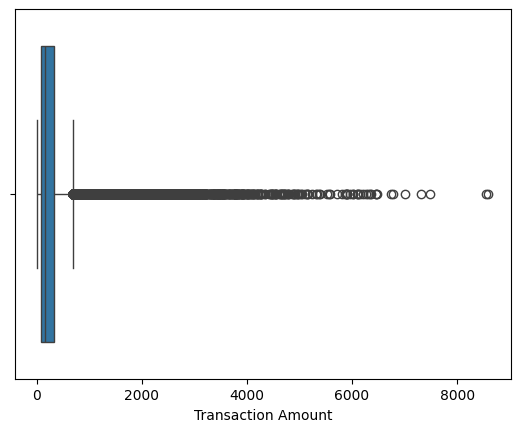

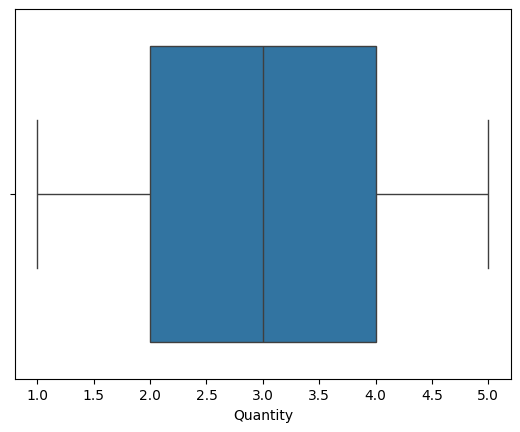

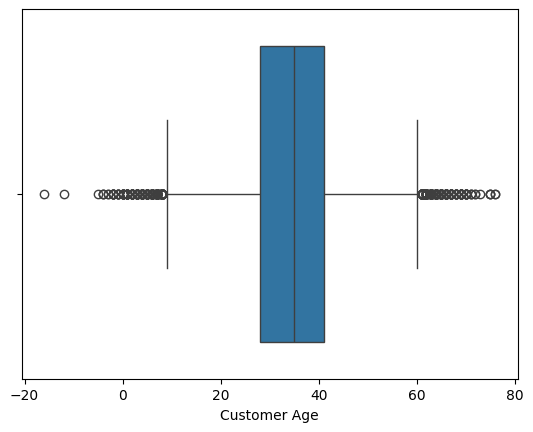

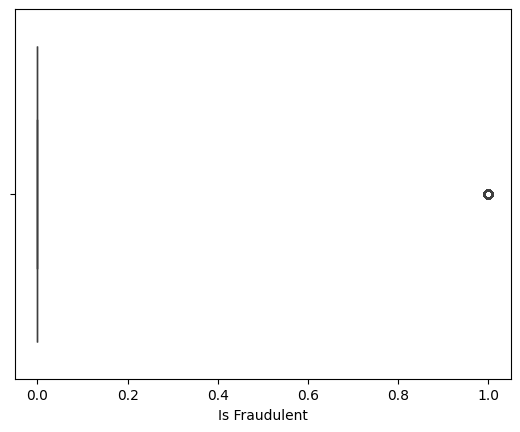

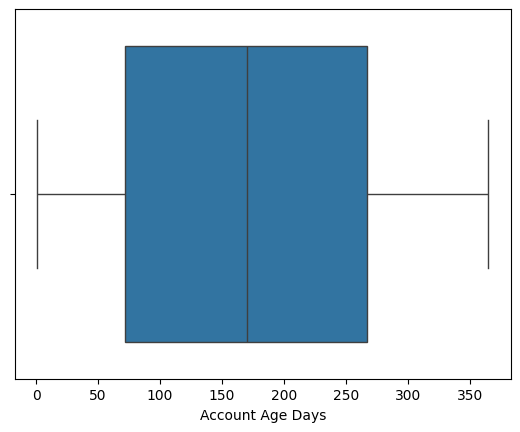

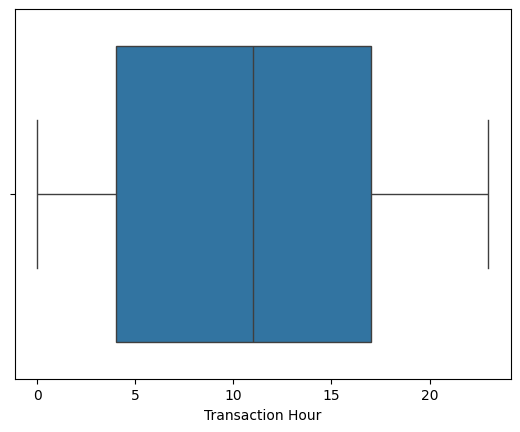

In [20]:
df_num =df.select_dtypes(include = [np.number])
for feature in df_num.columns:
    sns.boxplot(x=df_num[feature])
    plt.show()

- Transaction amount and customer age having outliers

In [21]:
q1 = df["Transaction Amount"].quantile(0.25)
q3 = df["Transaction Amount"].quantile(0.75)

IQR = q3-q1

Upper_whisker = q3+(1.5*IQR)
Lower_whisker = q1-(1.5*IQR)

new_df = df[~((df["Transaction Amount"] < Lower_whisker) | (df["Transaction Amount"] > Upper_whisker))]
new_df.shape

(83046, 9)

In [22]:
q1 = new_df["Customer Age"].quantile(0.25)
q3 = new_df["Customer Age"].quantile(0.75)

IQR = q3-q1

Upper_whisker = q3+(1.5*IQR)
Lower_whisker = q1-(1.5*IQR)

df_final = new_df[~((new_df["Customer Age"] < Lower_whisker) | (new_df["Customer Age"] > Upper_whisker))]
df_final.shape

(82254, 9)

### Numerical Columns :

In [23]:
df_final["Is Fraudulent"] = df_final["Is Fraudulent"].astype(object)

In [24]:
num = df_final.select_dtypes(include=np.number).columns.to_list()
num

['Transaction Amount',
 'Quantity',
 'Customer Age',
 'Account Age Days',
 'Transaction Hour']

In [25]:
len(df_final.select_dtypes(include=np.number).columns.to_list())

5

- The dataset consists of 5 numerical variables.

### Categorical Columns :

In [26]:
cat=df_final.select_dtypes(exclude=np.number).columns.to_list()
cat

['Payment Method', 'Product Category', 'Device Used', 'Is Fraudulent']

In [27]:
len(df_final.select_dtypes(exclude=np.number).columns.to_list())

4

- The dataset consists of 4 catergorical variables.

# Univariate Analysis   

Categorical Variables :

In [28]:
df_final[cat]

,Payment Method,Product Category,Device Used,Is Fraudulent
0,debit card,electronics,desktop,0
1,debit card,electronics,tablet,0
2,debit card,health & beauty,mobile,0
3,debit card,home & garden,mobile,0
4,credit card,toys & games,desktop,0
...,...,...,...,...
88947,PayPal,home & garden,mobile,0
88948,credit card,home & garden,desktop,0
88949,debit card,health & beauty,desktop,0
88950,debit card,toys & games,mobile,0


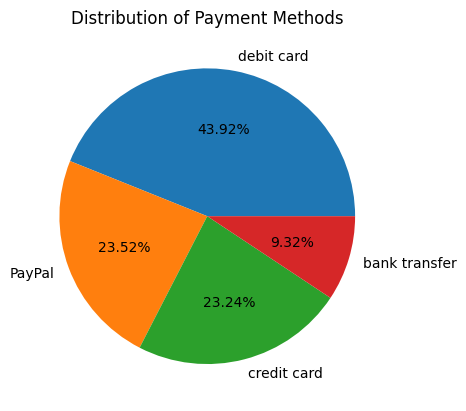

In [29]:
payment_method_counts = df_final['Payment Method'].value_counts()

plt.pie(payment_method_counts,labels=payment_method_counts.index,autopct='%.2f%%')
plt.title('Distribution of Payment Methods')
plt.show()


- The highest proportion of transactions (43.92%) are made using debit cards. This suggests that debit cards are a popular payment method among customers in the e-commerce platform.
- While not as prevalent as debit cards, PayPal (23.52%) and credit cards (23.24%) still represent a substantial portion of transactions. This indicates that customers often opt for these convenient and widely accepted payment methods for their online purchases.
-  Bank transfers account for a smaller proportion (9.32%) of transactions compared to debit cards, PayPal, and credit cards. This might imply that customers prefer methods with immediate processing and buyer protection, as bank transfers often involve longer processing times and may lack certain safeguards.

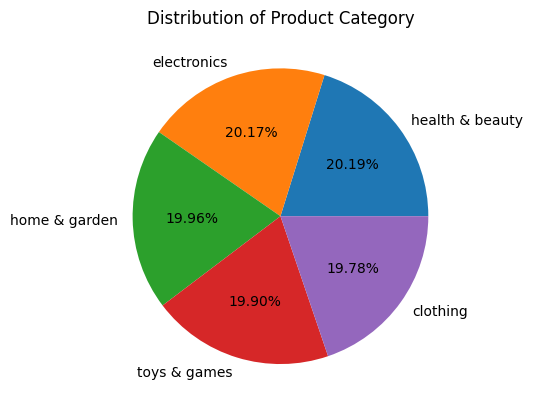

In [30]:
Product_Category_counts = df_final['Product Category'].value_counts()

plt.pie(Product_Category_counts,labels=Product_Category_counts.index,autopct='%.2f%%')
plt.title('Distribution of Product Category')
plt.show()

- The distribution of transactions across different product categories appears relatively balanced, with each category representing approximately 19-20% of the total transactions. This suggests that the e-commerce platform caters to a diverse range of consumer interests and preferences.

- Among the product categories, electronics and health/beauty stand out slightly with percentages of 20.17% and 20.20% respectively. This indicates that these categories may be more popular among customers compared to others.

- The presence of categories such as clothing, toys/games, and home & garden demonstrates that the e-commerce platform offers a wide variety of products to its customers. This diversity is likely to appeal to a broader customer base and encourage repeat visits.

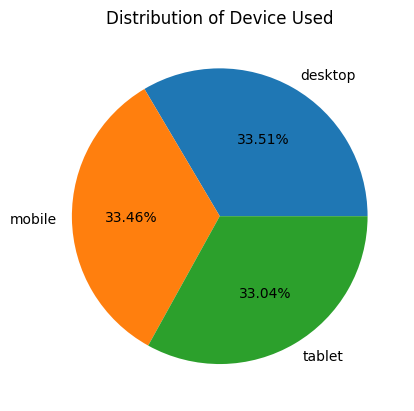

In [31]:
Device_Used_counts = df_final['Device Used'].value_counts()

plt.pie(Device_Used_counts,labels=Device_Used_counts.index,autopct='%.2f%%')
plt.title('Distribution of Device Used')
plt.show()

- The distribution of transactions shows a nearly equal split among desktop (33.51%), tablet (33.04%), and mobile (33.46%) devices. This suggests that customers are utilizing various devices interchangeably to access the e-commerce platform and make purchases.

- The near parity in transaction distribution across desktop, tablet, and mobile devices indicates that the e-commerce platform is effectively optimized for multiple device types. This accessibility enables customers to shop conveniently regardless of their preferred device, enhancing user experience and potentially increasing engagement and sales.

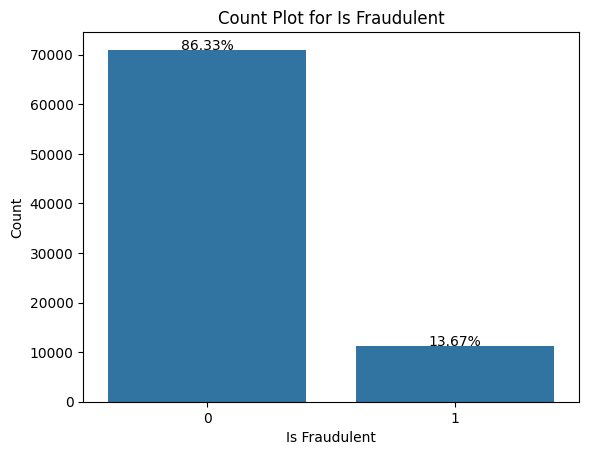

In [33]:
ax = sns.countplot(x=df_final['Is Fraudulent'])
# Add title and labels
plt.title('Count Plot for Is Fraudulent')
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')

# Calculate percentages
total = len(df_final['Is Fraudulent'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
            '{:.2f}%'.format((height / total) * 100),
            ha='center')
plt.show()

- With 86.33% of transactions labeled as non-fraudulent, it suggests that the majority of transactions on the e-commerce platform are genuine and conducted with integrity. This indicates a high level of trust among users and reflects positively on the overall security measures and reliability of the platform.

- While fraudulent transactions represent a smaller proportion (13.67%), their presence underscores the importance of robust fraud prevention efforts. E-commerce platforms must remain vigilant and proactive in detecting and preventing fraudulent activities to maintain user trust and protect against financial losses.

- The analysis reveals a significant class imbalance, with the majority (86.33%) of transactions labeled as non-fraudulent and a smaller proportion (13.67%) labeled as fraudulent.

Numerical Variables :

In [34]:
df_final[num]

,Transaction Amount,Quantity,Customer Age,Account Age Days,Transaction Hour
0,389.96,2,40,72,8
1,361.22,3,36,233,15
2,86.51,3,31,262,19
3,686.48,1,39,85,9
4,22.93,1,58,103,20
...,...,...,...,...,...
88947,326.64,3,43,353,19
88948,371.58,5,21,158,1
88949,19.53,2,30,194,5
88950,266.48,4,31,108,4


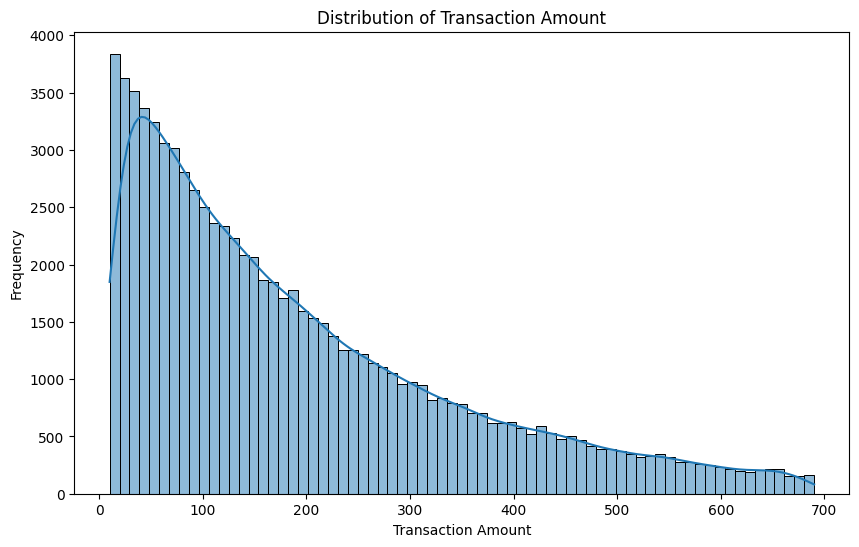

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df_final['Transaction Amount'],kde= True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

- Transaction amount are positively skewwed

In [36]:
df_final['Transaction Amount'].skew()

1.0763538032626647

<Axes: >

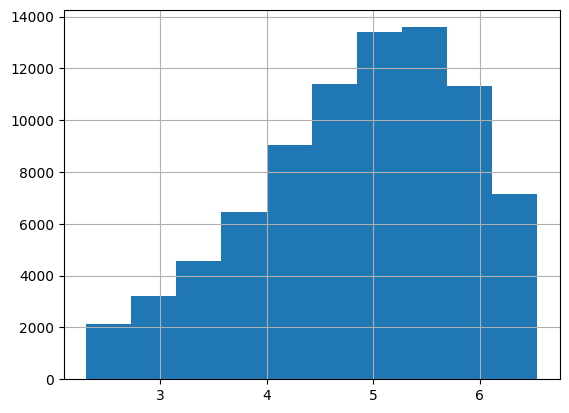

In [37]:
df_final['Transaction Amount Log'] = np.log(df_final['Transaction Amount'])
df_final['Transaction Amount Log'].hist()

In [38]:
df_final['Transaction Amount Log'].skew()

-0.481402903177441

In [39]:
df_final['Transaction Amount'] = df_final['Transaction Amount Log']
df_final['Transaction Amount'].skew()

-0.481402903177441

In [40]:
df_final = df_final.drop('Transaction Amount Log',axis = 1)

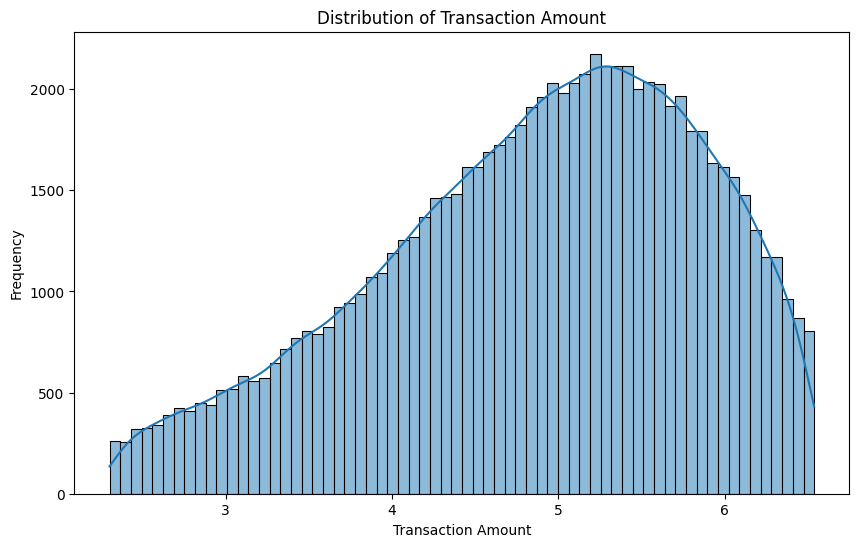

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df_final['Transaction Amount'],kde= True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

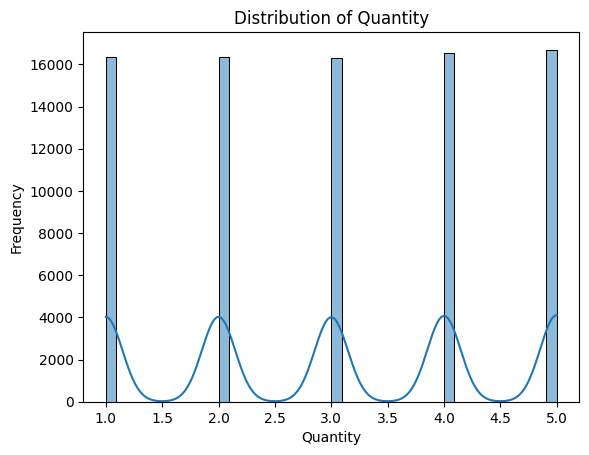

In [42]:
sns.histplot(df_final['Quantity'],kde= True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

In [43]:
df_final['Quantity'].skew()

-0.009823828617453796

 - Quantity are slightly negative skew

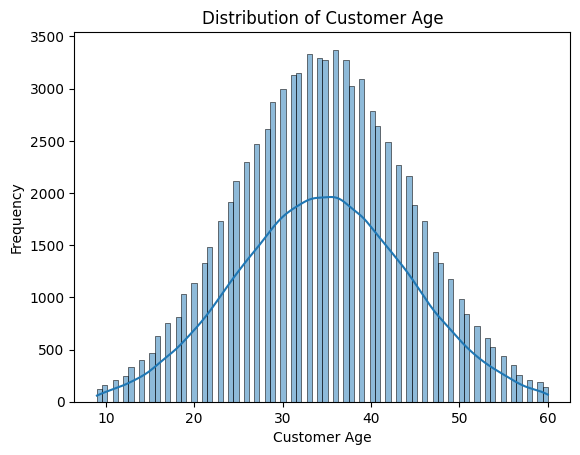

In [44]:
sns.histplot(df_final['Customer Age'],kde= True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

In [45]:
df_final['Customer Age'].skew()

0.009355288086004034

- Customer Age indicates a near-normal distribution with a balanced spread of data around the mean

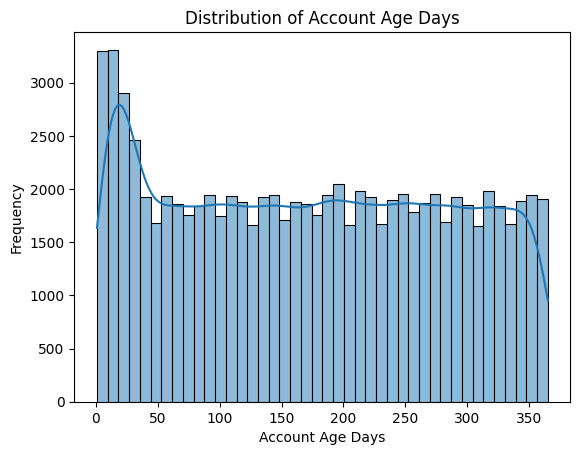

In [46]:
sns.histplot(df_final['Account Age Days'],kde= True)
plt.title('Distribution of Account Age Days')
plt.xlabel('Account Age Days')
plt.ylabel('Frequency')
plt.show()

In [47]:
df_final['Account Age Days'].skew()

0.052898030265627165

- Account Age Days are slight positive skewedand it indicates a distribution where values are slightly more concentrated on the left side of the mean, but the distribution remains relatively balanced and approximately normal.

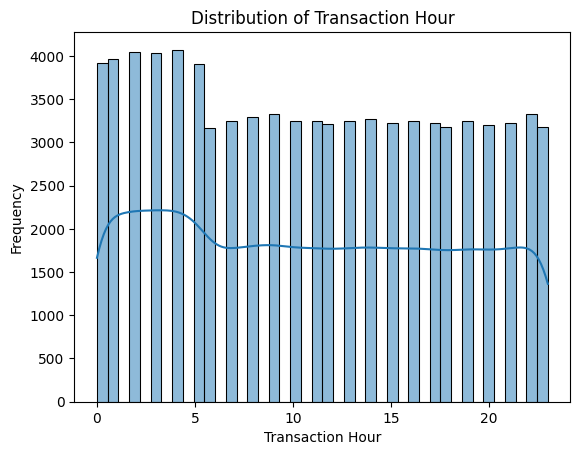

In [48]:
sns.histplot(df_final['Transaction Hour'],kde= True)
plt.title('Distribution of Transaction Hour')
plt.xlabel('Transaction Hour')
plt.ylabel('Frequency')
plt.show()

In [49]:
df_final['Transaction Hour'].skew()

0.0872383854978647

- Transactio hour has slight positive skew in the distribution, it is relatively mild and may not significantly affect the overall interpretation of the data

# Bivariate Analysis :

### Categorical vs Target(Categorical)

In [50]:
df_final[cat].columns.to_list()

['Payment Method', 'Product Category', 'Device Used', 'Is Fraudulent']

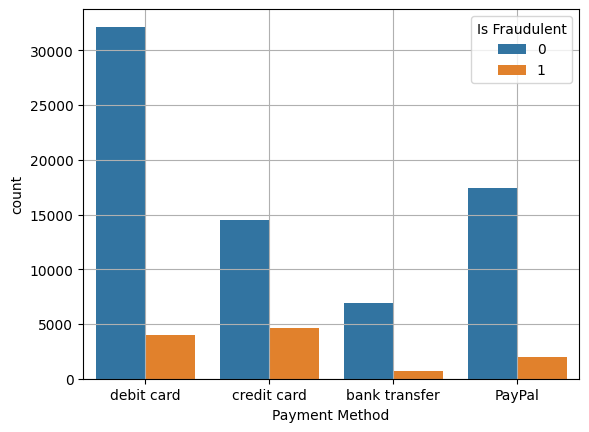

In [51]:
sns.countplot(x=df_final['Payment Method'],hue=df_final['Is Fraudulent'])
plt.grid()
plt.show()

- From the above graph it can be inferred that the customer using Credit card payment method has the highest probabilty of being a Fraudulent, and similarly borrower who falls under Bank transfer payment method has the least probabilty.

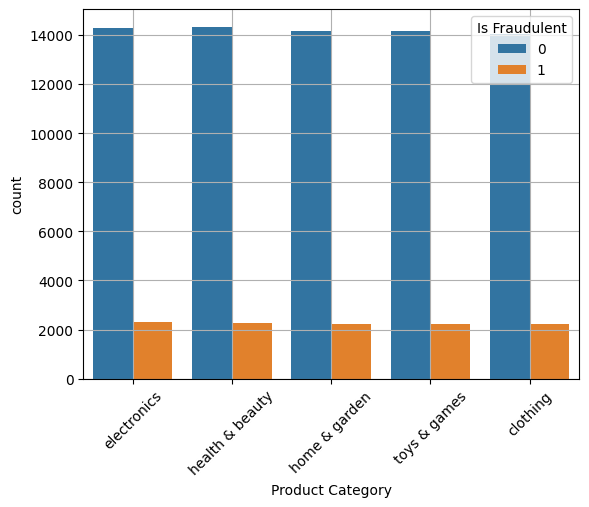

In [52]:
sns.countplot(x=df_final['Product Category'],hue=df_final['Is Fraudulent'])
plt.xticks(rotation=45)
plt.grid()
plt.show()

- From the above graph it can be inferred that the customer is fraudulent or non fraudulent are not determined based on based category

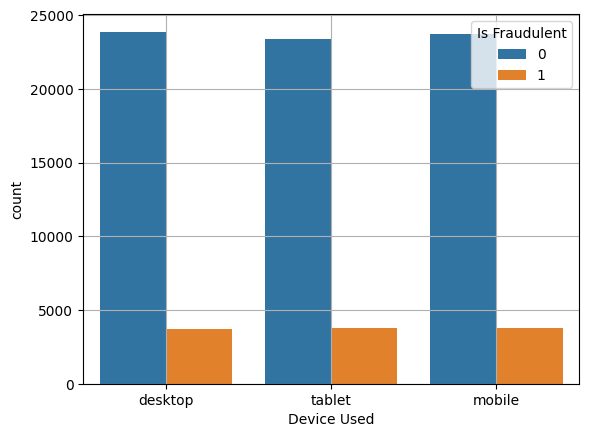

In [53]:
sns.countplot(x=df_final['Device Used'],hue=df_final['Is Fraudulent'])
plt.grid()
plt.show()

- From the above graph it can be inferred that the customer is fraudulent or non fraudulent are not determined based on deviced used

### Numerical vs Target(Categorical)

In [54]:
df_final[num].columns.to_list()

['Transaction Amount',
 'Quantity',
 'Customer Age',
 'Account Age Days',
 'Transaction Hour']

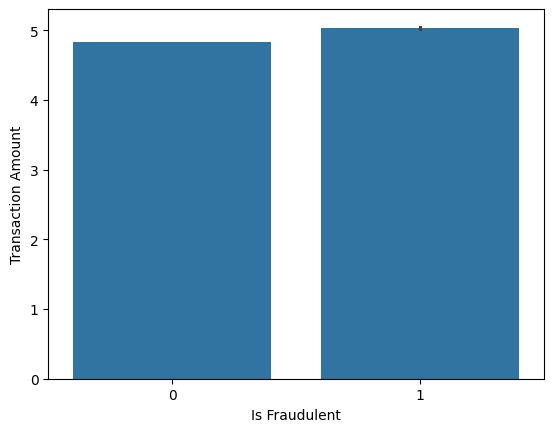

In [55]:
sns.barplot(y=df_final['Transaction Amount'],x=df_final['Is Fraudulent'])
plt.show()

- From the above graph it can be inferred that the customer is fraudulent are determined based on transaction amount

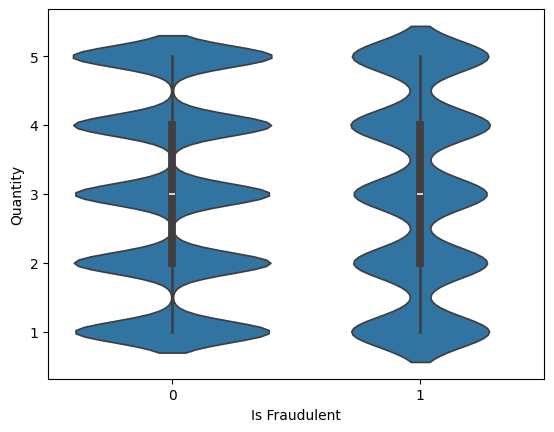

In [56]:
sns.violinplot(y=df_final['Quantity'],x=df_final['Is Fraudulent'])
plt.show()

- From the above graph it can be inferred that the customer is fraudulent or non fraudulent are not determined based on quatity

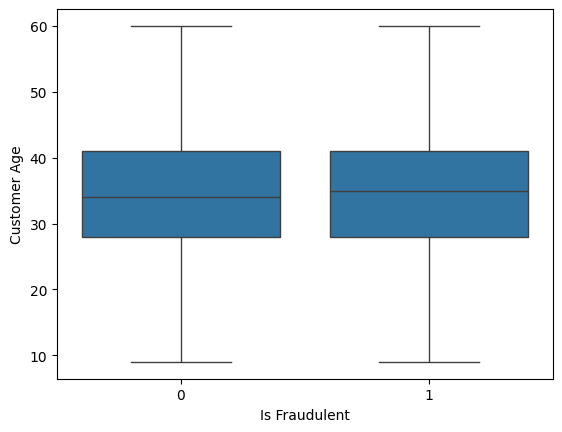

In [57]:
sns.boxplot(y=df_final['Customer Age'],x=df_final['Is Fraudulent'])
plt.show()

- From the above graph it can be inferred that the customer is fraudulent or non fraudulent are not determined based on Age

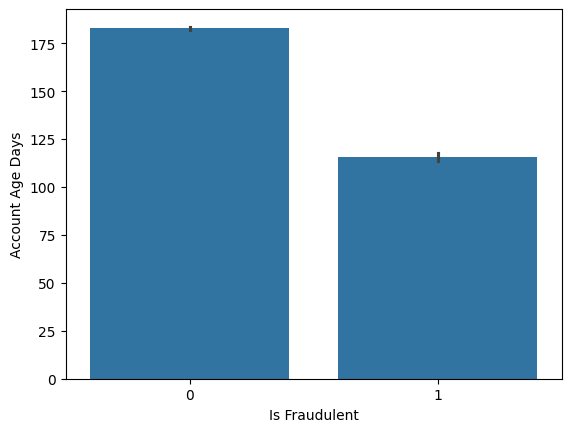

In [58]:
sns.barplot(y=df_final['Account Age Days'],x=df_final['Is Fraudulent'])
plt.show()

- From the above graph it can be inferred that the customer is fraudulent are determined based on account age days as its contributes less.

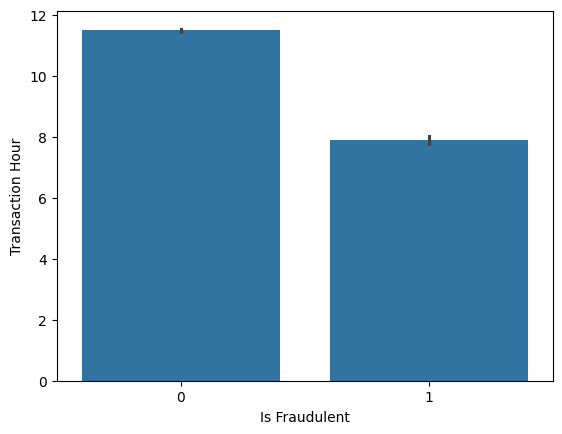

In [59]:
sns.barplot(y=df_final['Transaction Hour'],x=df_final['Is Fraudulent'])
plt.show()

- From the above graph it can be inferred that the customer is fraudulent are determined based on transaction hour as its contributes less.

# Multivariate Analysis :

### HeatMap

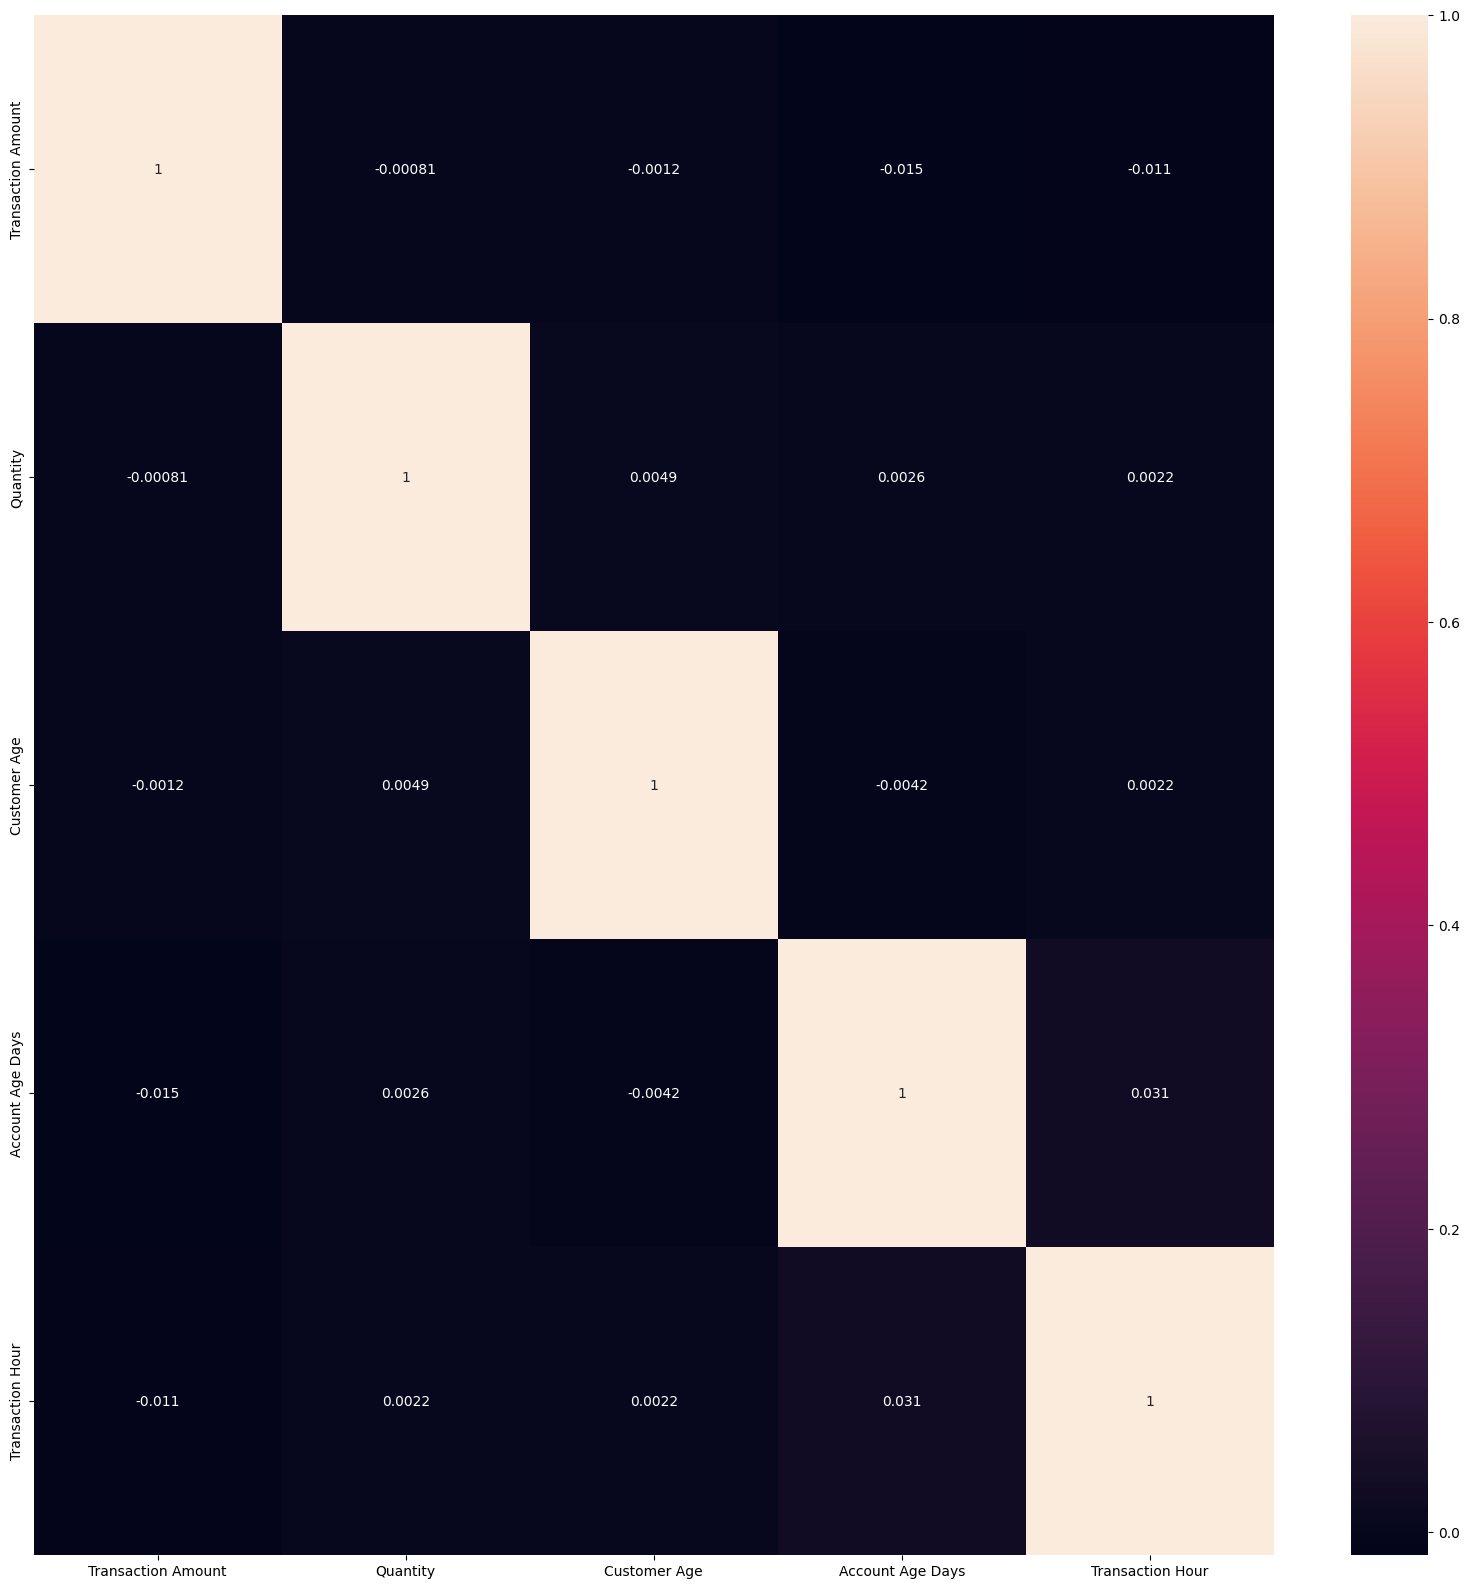

In [61]:
plt.figure(figsize=(20,20))
sns.heatmap(df_final[num].corr(),annot=True)
plt.show()

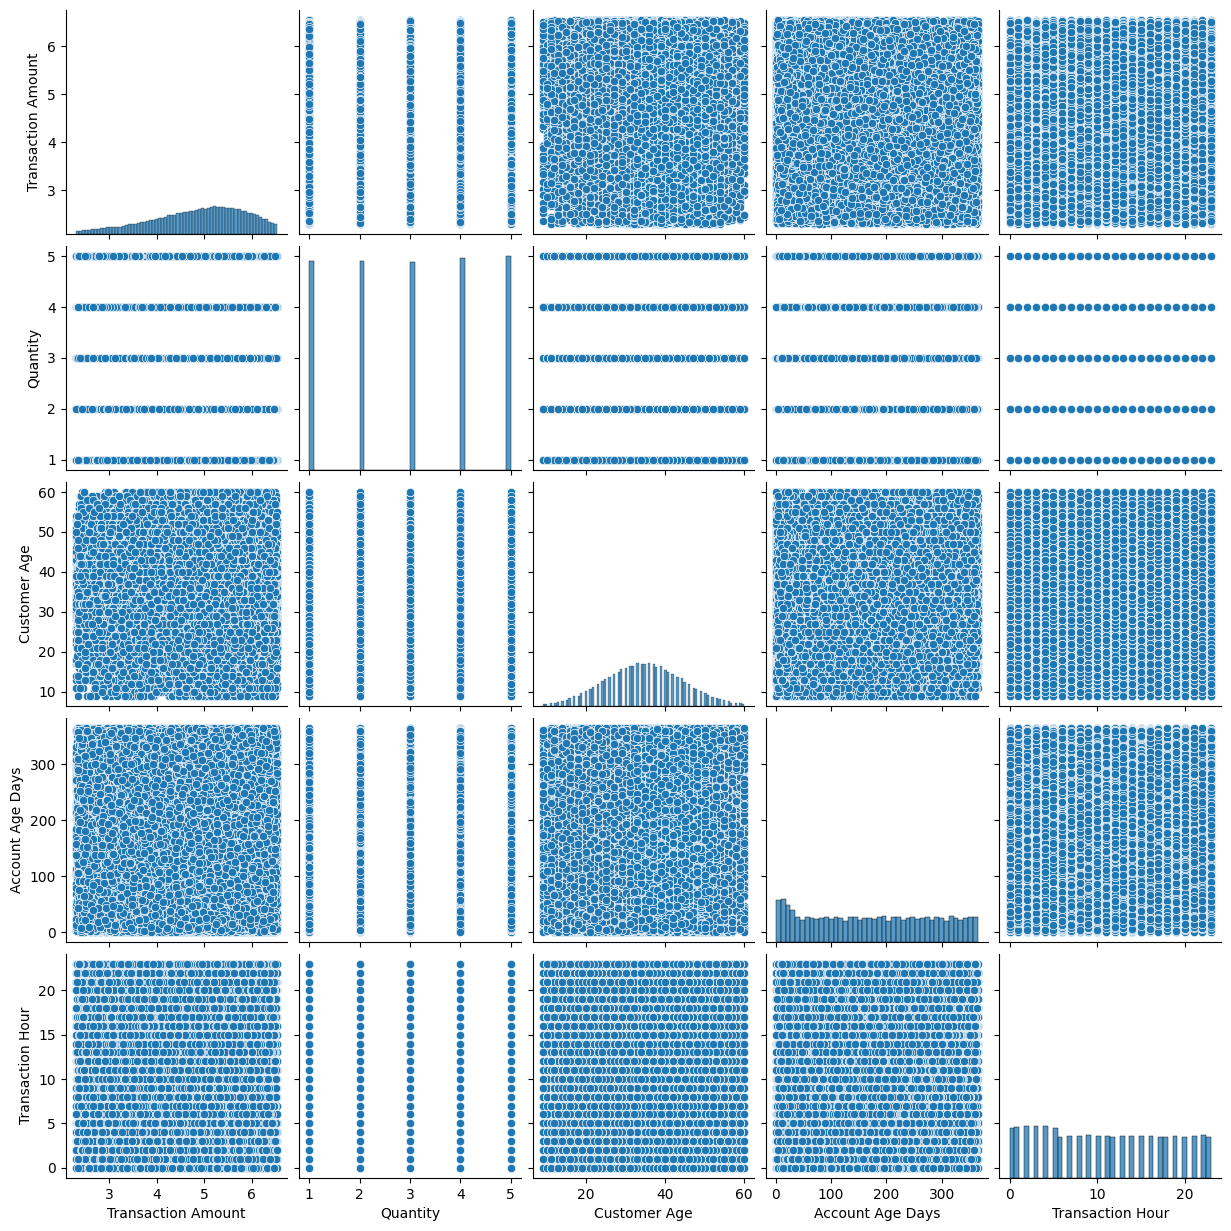

In [62]:
sns.pairplot(df_final[num])
plt.show()

- Less correlated

# Encoding

In [63]:
df_final

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour
0,5.966044,debit card,electronics,2,40,desktop,0,72,8
1,5.889487,debit card,electronics,3,36,tablet,0,233,15
2,4.460260,debit card,health & beauty,3,31,mobile,0,262,19
3,6.531577,debit card,home & garden,1,39,mobile,0,85,9
4,3.132446,credit card,toys & games,1,58,desktop,0,103,20
...,...,...,...,...,...,...,...,...,...
88947,5.788859,PayPal,home & garden,3,43,mobile,0,353,19
88948,5.917764,credit card,home & garden,5,21,desktop,0,158,1
88949,2.971952,debit card,health & beauty,2,30,desktop,0,194,5
88950,5.585299,debit card,toys & games,4,31,mobile,0,108,4


In [64]:
categorical_columns = ["Payment Method", "Product Category", "Device Used"]

df_with_dummies = pd.get_dummies(df_final, columns=categorical_columns,dtype = int)

# Display the DataFrame with dummy variables
df_with_dummies

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,5.966044,2,40,0,72,8,0,0,0,1,0,1,0,0,0,1,0,0
1,5.889487,3,36,0,233,15,0,0,0,1,0,1,0,0,0,0,0,1
2,4.460260,3,31,0,262,19,0,0,0,1,0,0,1,0,0,0,1,0
3,6.531577,1,39,0,85,9,0,0,0,1,0,0,0,1,0,0,1,0
4,3.132446,1,58,0,103,20,0,0,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88947,5.788859,3,43,0,353,19,1,0,0,0,0,0,0,1,0,0,1,0
88948,5.917764,5,21,0,158,1,0,0,1,0,0,0,0,1,0,1,0,0
88949,2.971952,2,30,0,194,5,0,0,0,1,0,0,1,0,0,1,0,0
88950,5.585299,4,31,0,108,4,0,0,0,1,0,0,0,0,1,0,1,0


# Statistical Analysis

In [65]:
df_final.head(2)

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour
0,5.966044,debit card,electronics,2,40,desktop,0,72,8
1,5.889487,debit card,electronics,3,36,tablet,0,233,15


In [66]:
df_final.describe()

,Transaction Amount,Quantity,Customer Age,Account Age Days,Transaction Hour
count,82254.000000,82254.000000,82254.000000,82254.000000,82254.000000
mean,4.859102,3.010589,34.532120,173.684490,10.999356
std,0.978116,1.416729,9.657716,109.175842,7.037396
min,2.302585,1.000000,9.000000,1.000000,0.000000
25%,4.207115,2.000000,28.000000,76.000000,5.000000
50%,4.983812,3.000000,35.000000,173.000000,11.000000
75%,5.621116,4.000000,41.000000,268.000000,17.000000
max,6.536750,5.000000,60.000000,365.000000,23.000000


In [70]:
df_final.describe(include = 'O')

,Payment Method,Product Category,Device Used,Is Fraudulent
count,82254,82254,82254,82254
unique,4,5,3,2
top,debit card,health & beauty,desktop,0
freq,36126,16604,27560,71008


In [71]:
from scipy.stats import ttest_ind

# Performing t-test for each numerical variable against the target variable
variables = ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour']
results = {}
alpha = 0.05  # Significance level

for var in variables:
    fraudulent_data = df_final[df_final['Is Fraudulent'] == 1][var]
    non_fraudulent_data = df_final[df_final['Is Fraudulent'] == 0][var]
    stat, p = ttest_ind(fraudulent_data, non_fraudulent_data)
    results[var] = {'Statistic': stat, 'P-value': p, 'Significant': p < alpha}

# Display the results with significance information
for var, result in results.items():
    significance = "significant" if result['Significant'] else "not significant"
    print(f"{var}: Statistic = {result['Statistic']:.3f}, P-value = {result['P-value']:.3f} ({significance})")


Transaction Amount: Statistic = 20.237, P-value = 0.000 (significant)
Quantity: Statistic = -0.552, P-value = 0.581 (not significant)
Customer Age: Statistic = 1.242, P-value = 0.214 (not significant)
Account Age Days: Statistic = -62.029, P-value = 0.000 (significant)
Transaction Hour: Statistic = -51.292, P-value = 0.000 (significant)


In [72]:
from scipy.stats import chi2_contingency

# Performing Chi-square test for each categorical variable against the target variable
categorical_variables = ['Payment Method', 'Product Category', 'Device Used']
results = {}
alpha = 0.05  # Significance level

for var in categorical_variables:
    contingency_table = pd.crosstab(df_final[var], df_final['Is Fraudulent'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    results[var] = {'Chi-square': chi2, 'P-value': p, 'Significant': p < alpha}

# Display the results with significance information
for var, result in results.items():
    significance = "significant" if result['Significant'] else "not significant"
    print(f"{var}: Chi-square = {result['Chi-square']:.3f}, P-value = {result['P-value']:.3f} ({significance})")

Payment Method: Chi-square = 2295.833, P-value = 0.000 (significant)
Product Category: Chi-square = 1.298, P-value = 0.862 (not significant)
Device Used: Chi-square = 3.440, P-value = 0.179 (not significant)


# Model building

In [73]:
df_with_dummies.dtypes

Transaction Amount                  float64
Quantity                              int64
Customer Age                          int64
Is Fraudulent                        object
Account Age Days                      int64
Transaction Hour                      int64
Payment Method_PayPal                 int32
Payment Method_bank transfer          int32
Payment Method_credit card            int32
Payment Method_debit card             int32
Product Category_clothing             int32
Product Category_electronics          int32
Product Category_health & beauty      int32
Product Category_home & garden        int32
Product Category_toys & games         int32
Device Used_desktop                   int32
Device Used_mobile                    int32
Device Used_tablet                    int32
dtype: object

In [74]:
df_with_dummies["Is Fraudulent"] = df_with_dummies["Is Fraudulent"].astype('int32')

In [75]:
df_with_dummies.dtypes

Transaction Amount                  float64
Quantity                              int64
Customer Age                          int64
Is Fraudulent                         int32
Account Age Days                      int64
Transaction Hour                      int64
Payment Method_PayPal                 int32
Payment Method_bank transfer          int32
Payment Method_credit card            int32
Payment Method_debit card             int32
Product Category_clothing             int32
Product Category_electronics          int32
Product Category_health & beauty      int32
Product Category_home & garden        int32
Product Category_toys & games         int32
Device Used_desktop                   int32
Device Used_mobile                    int32
Device Used_tablet                    int32
dtype: object

In [76]:
# Split the data into features (X) and the target variable (y)
X = df_with_dummies.drop("Is Fraudulent", axis=1)  
y = df_with_dummies["Is Fraudulent"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
num_cols = ['Transaction Amount','Quantity','Customer Age','Account Age Days','Transaction Hour']

In [78]:
from sklearn.preprocessing import StandardScaler  
ss = StandardScaler()  
for i in num_cols:     
    X_train[i] = ss.fit_transform(X_train[[i]])     
    X_test[i] = ss.transform(X_test[[i]])

Accuracy: 0.8713782064270373
Confusion Matrix:
 [[21165   139]
 [ 3035   338]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93     21304
           1       0.71      0.10      0.18      3373

    accuracy                           0.87     24677
   macro avg       0.79      0.55      0.55     24677
weighted avg       0.85      0.87      0.83     24677



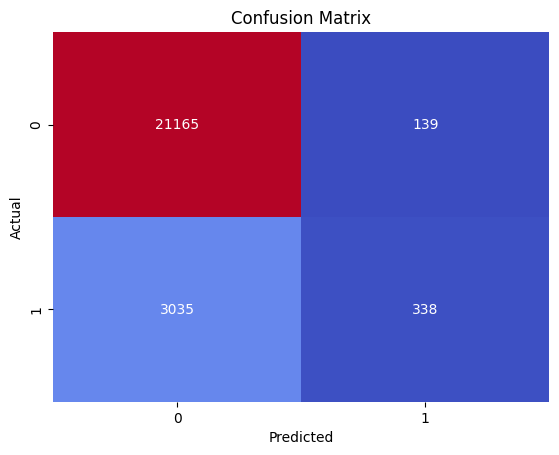

In [79]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)


y_pred = logistic_regressor.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  # Overall accuracy
conf_matrix = confusion_matrix(y_test, y_pred)  # Confusion matrix
class_report = classification_report(y_test, y_pred)  # Detailed report

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

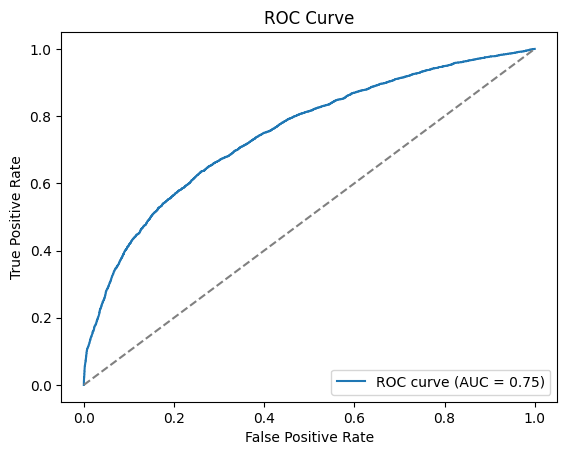

In [80]:
y_proba = logistic_regressor.predict_proba(X_test)[:, 1]

# Compute the false positive rate and true positive rate
fpr, tpr, _ = roc_curve(y_test, y_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### SMOTE  
    Inorder to increase the minority class, since our target variable is un-evenly distributed, we have decided to perform   SMOTE and increase the minority class by 40%

### Further upcoming models will be built on SMOTE applied dataset


In [81]:
df_with_dummies["Is Fraudulent"].value_counts()

Is Fraudulent
0    71008
1    11246
Name: count, dtype: int64

In [82]:
print(round((40/60)*71008))

47339


In [83]:
ovr_sample = SMOTE(sampling_strategy={0:71008,1:47339},k_neighbors = 5, random_state=100)

# Apply sampling technique to data
X_new1, y_new1 = ovr_sample.fit_resample(X, y)

print('\nClass distribution AFTER SMOTE')
print(y_new1.value_counts().sort_index())


Class distribution AFTER SMOTE
Is Fraudulent
0    71008
1    47339
Name: count, dtype: int64


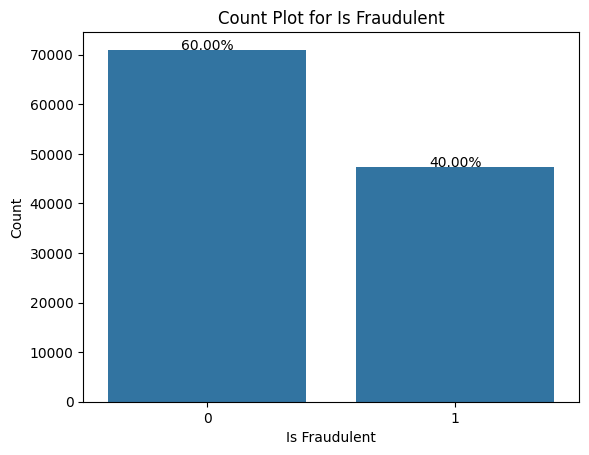

In [84]:
ax = sns.countplot(x=y_new1)
# Add title and labels
plt.title('Count Plot for Is Fraudulent')
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')

# Calculate percentages
total = len(y_new1)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
            '{:.2f}%'.format((height / total) * 100),
            ha='center')
plt.show()

In [85]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new1, y_new1, test_size=0.2, random_state=42)

In [86]:
from sklearn.preprocessing import StandardScaler  
ss = StandardScaler()  
for i in num_cols:     
    X_train_new[i] = ss.fit_transform(X_train_new[[i]])     
    X_test_new[i] = ss.transform(X_test_new[[i]])

In [87]:
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train_new, y_train_new)

y_pred = logistic_regressor.predict(X_test_new)
y_pred_proba = logistic_regressor.predict_proba(X_test_new)[:,1]

In [88]:
print(X_train_new.shape)
print(X_test_new.shape)
print(y_train_new.shape)
print(y_test_new.shape)

(94677, 17)
(23670, 17)
(94677,)
(23670,)


In [97]:
X_train_new

,Transaction Amount,Quantity,Customer Age,Account Age Days,Transaction Hour,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
96495,0.574456,-0.657889,-0.149913,1.113496,0.984692,0,0,0,0,0,0,0,0,0,0,0,0
86304,0.175733,-0.657889,2.351768,-1.246328,-0.406091,0,0,0,0,0,0,0,0,0,0,0,0
45723,-0.696137,0.065780,2.143294,-0.241218,-1.101483,0,0,0,1,0,0,1,0,0,0,0,1
19453,0.060650,0.065780,0.267034,-1.106487,-1.379640,0,0,0,1,0,1,0,0,0,0,0,1
34926,0.432344,0.065780,-0.775333,-0.555861,0.428379,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,-0.071588,-1.381558,-0.358386,0.833813,1.262849,0,0,0,1,0,1,0,0,0,0,0,1
110268,1.303309,0.065780,1.309401,-0.975385,1.123771,0,0,0,0,1,0,0,0,0,0,0,0
103694,1.199084,-0.657889,-0.566859,-1.036566,-0.684248,0,0,0,0,0,0,0,0,0,0,0,0
860,0.436453,-1.381558,1.205164,1.830183,-0.267013,1,0,0,0,0,1,0,0,0,0,1,0


Accuracy: 0.8965779467680608
Confusion Matrix:
 [[14128   202]
 [ 2246  7094]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92     14330
           1       0.97      0.76      0.85      9340

    accuracy                           0.90     23670
   macro avg       0.92      0.87      0.89     23670
weighted avg       0.91      0.90      0.89     23670

ROC AUC Score: 0.9300424006778132


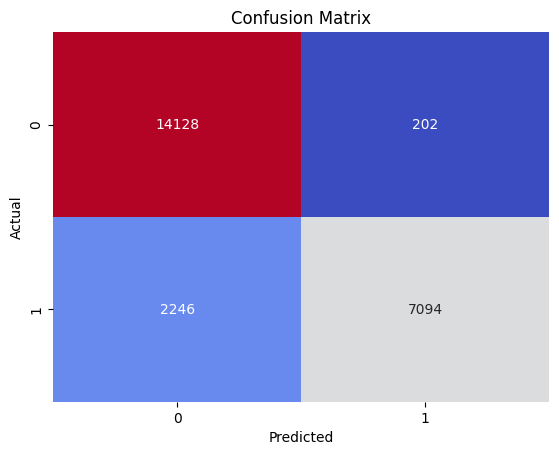

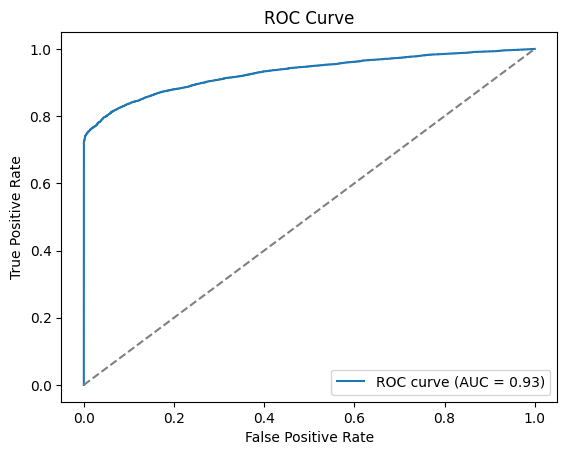

In [89]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test_new, y_pred)
conf_matrix = confusion_matrix(y_test_new, y_pred)
class_report = classification_report(y_test_new, y_pred)
roc_auc = roc_auc_score(y_test_new, logistic_regressor.predict_proba(X_test_new)[:, 1])

# Display results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test_new, logistic_regressor.predict_proba(X_test_new)[:, 1])
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [90]:
# creating an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Algorithm', 'Accuracy Score', 'AUC Score', 'f1-score', 'Precision Score', 'Recall Score'])

def update_score_card(algorithm_name, y_pred, y_pred_proba):
    
    # let 'y_pred_prob' be the predicted values of y
    #global score_card

    new_row = [algorithm_name,
               accuracy_score(y_test_new, y_pred),
               roc_auc_score(y_test_new, y_pred_proba),  
               f1_score(y_test_new, y_pred),
               precision_score(y_test_new, y_pred),
               recall_score(y_test_new, y_pred),
               ] 
    
    score_card.loc[len(score_card)] = new_row

In [91]:
update_score_card("Logistic Regression", y_pred, y_pred_proba)
score_card

,Algorithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Logistic Regression,0.896578,0.930042,0.852849,0.972314,0.759529


In [92]:
# KNN model
knn_model = KNeighborsClassifier()

knn_model = knn_model.fit(X_train_new, y_train_new)
y_pred = knn_model.predict(X_test_new)
y_pred_proba = knn_model.predict_proba(X_test_new)[:,1]

In [93]:
print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     14330
           1       0.91      0.80      0.85      9340

    accuracy                           0.89     23670
   macro avg       0.90      0.87      0.88     23670
weighted avg       0.89      0.89      0.89     23670



In [94]:
update_score_card("KNN", y_pred, y_pred_proba)
score_card

,Algorithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Logistic Regression,0.896578,0.930042,0.852849,0.972314,0.759529
1,KNN,0.890706,0.922289,0.852045,0.914549,0.797537


In [95]:
# KNN with tuned parameters

tuned_parameters={'n_neighbors':np.arange(10,50,5),
                 "metric":["euclidean","manhattan","Chebyshev"]}


knn_classification=KNeighborsClassifier()

knn_grid=GridSearchCV(estimator=knn_classification, param_grid=tuned_parameters,cv=5,scoring="accuracy",n_jobs=-1)

knn_grid.fit(X_train_new,y_train_new)
print("Best parameters for KNN classifier :",knn_grid.best_params_,"\n")

Best parameters for KNN classifier : {'metric': 'manhattan', 'n_neighbors': 15} 



In [96]:
# Tuning further
tuned_parameters={'n_neighbors':np.arange(3,15,2),
                 "metric":["manhattan"]}


knn_classification=KNeighborsClassifier()

knn_grid=GridSearchCV(estimator=knn_classification, param_grid=tuned_parameters,cv=5,scoring="accuracy",n_jobs=-1)

knn_grid.fit(X_train_new,y_train_new)
print("Best parameters for KNN classifier :",knn_grid.best_params_,"\n")

Best parameters for KNN classifier : {'metric': 'manhattan', 'n_neighbors': 11} 



In [133]:
knn_classification = KNeighborsClassifier(n_neighbors = 11,metric='manhattan')
knn_model = knn_classification.fit(X_train_new,y_train_new)

y_pred = knn_model.predict(X_test_new)
y_pred_proba = knn_model.predict_proba(X_test_new)[:,1]


In [134]:
print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     14330
           1       0.93      0.80      0.86      9340

    accuracy                           0.90     23670
   macro avg       0.90      0.88      0.89     23670
weighted avg       0.90      0.90      0.89     23670



In [135]:
update_score_card("KNN-with tuned parameters", y_pred, y_pred_proba)
score_card

,Algorithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Logistic Regression,0.896578,0.930042,0.852849,0.972314,0.759529
1,KNN,0.890706,0.922289,0.852045,0.914549,0.797537
2,KNN-with tuned parameters,0.896198,0.939738,0.858231,0.930672,0.796253


In [136]:
# Gaussian Naive Bayes

model = GaussianNB()
model.fit(X_train_new, y_train_new)

y_pred=model.predict(X_test_new)
y_pred_proba = model.predict_proba(X_test_new)[:,1]


In [137]:
print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87     14330
           1       0.82      0.77      0.79      9340

    accuracy                           0.84     23670
   macro avg       0.84      0.83      0.83     23670
weighted avg       0.84      0.84      0.84     23670



In [138]:
update_score_card("Gaussian Naive Bayes", y_pred, y_pred_proba)
score_card

,Algorithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Logistic Regression,0.896578,0.930042,0.852849,0.972314,0.759529
1,KNN,0.890706,0.922289,0.852045,0.914549,0.797537
2,KNN-with tuned parameters,0.896198,0.939738,0.858231,0.930672,0.796253
3,Gaussian Naive Bayes,0.841360,0.890595,0.793010,0.817293,0.770128


In [139]:
# Decision Tree

dt_model = DecisionTreeClassifier()

dt_model = dt_model.fit(X_train_new, y_train_new)
y_pred= dt_model.predict(X_test_new)
y_pred_proba = dt_model.predict_proba(X_test_new)[:,1]

In [140]:
print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     14330
           1       0.81      0.83      0.82      9340

    accuracy                           0.86     23670
   macro avg       0.85      0.85      0.85     23670
weighted avg       0.86      0.86      0.86     23670



In [141]:
update_score_card("Decision Tree", y_pred, y_pred_proba)
score_card

,Algorithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Logistic Regression,0.896578,0.930042,0.852849,0.972314,0.759529
1,KNN,0.890706,0.922289,0.852045,0.914549,0.797537
2,KNN-with tuned parameters,0.896198,0.939738,0.858231,0.930672,0.796253
3,Gaussian Naive Bayes,0.841360,0.890595,0.793010,0.817293,0.770128
4,Decision Tree,0.857076,0.852545,0.821072,0.811331,0.831049


In [142]:
# Decision Tree with tuned parameters

param_grid={"max_depth":[10,15,20,25,30], 
            "min_samples_leaf":[3,15,30],
            "min_samples_split":[15,30,35,40,45],
            "max_features":["sqrt","log2"],
            "max_leaf_nodes":range(2,10,2)}

decision_tree_classification = DecisionTreeClassifier(random_state=10)

tree_grid = GridSearchCV(estimator = decision_tree_classification,
                        param_grid = param_grid, cv = 5,n_jobs=-1)

tree_grid_model = tree_grid.fit(X_train_new, y_train_new)

print('Best parameters for the decision tree classifier:', tree_grid_model.best_params_,'\n')


Best parameters for the decision tree classifier: {'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 3, 'min_samples_split': 15} 



In [143]:
# final decision tree model

dt_model = DecisionTreeClassifier(max_depth = 10,
                                 min_samples_leaf =3,
                                 min_samples_split = 15,
                                max_features="sqrt",
                                  max_leaf_nodes=8,
                                  random_state=10)
                                                                              

dt_model = dt_model.fit(X_train_new, y_train_new)

y_pred=dt_model.predict(X_test_new)
y_pred_proba = dt_model.predict_proba(X_test_new)[:,1]

print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82     14330
           1       0.75      0.59      0.66      9340

    accuracy                           0.76     23670
   macro avg       0.76      0.73      0.74     23670
weighted avg       0.76      0.76      0.75     23670



In [144]:
update_score_card("Decision Tree-with tuned parameters", y_pred, y_pred_proba)
score_card

,Algorithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Logistic Regression,0.896578,0.930042,0.852849,0.972314,0.759529
1,KNN,0.890706,0.922289,0.852045,0.914549,0.797537
2,KNN-with tuned parameters,0.896198,0.939738,0.858231,0.930672,0.796253
3,Gaussian Naive Bayes,0.841360,0.890595,0.793010,0.817293,0.770128
4,Decision Tree,0.857076,0.852545,0.821072,0.811331,0.831049
5,Decision Tree-with tuned parameters,0.760372,0.756565,0.659911,0.749932,0.589186


In [145]:
# Random Forest

rf_model = RandomForestClassifier()
rf_model.fit(X_train_new, y_train_new)


y_pred = rf_model.predict(X_test_new)
y_pred_proba = rf_model.predict_proba(X_test_new)[:,1]

print(classification_report(y_test_new,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     14330
           1       0.94      0.83      0.88      9340

    accuracy                           0.91     23670
   macro avg       0.92      0.90      0.91     23670
weighted avg       0.91      0.91      0.91     23670



In [146]:
update_score_card("Random Forest", y_pred, y_pred_proba)
score_card

,Algorithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Logistic Regression,0.896578,0.930042,0.852849,0.972314,0.759529
1,KNN,0.890706,0.922289,0.852045,0.914549,0.797537
2,KNN-with tuned parameters,0.896198,0.939738,0.858231,0.930672,0.796253
3,Gaussian Naive Bayes,0.841360,0.890595,0.793010,0.817293,0.770128
4,Decision Tree,0.857076,0.852545,0.821072,0.811331,0.831049
5,Decision Tree-with tuned parameters,0.760372,0.756565,0.659911,0.749932,0.589186
6,Random Forest,0.912463,0.949386,0.882366,0.939207,0.832013


In [147]:
# Random Forest with tuned parameters

param_grid = { 'max_depth': np.arange(5,10), 
              'min_samples_split': np.arange(2,7), 
              'min_samples_leaf': np.arange(2,6)}
rt = RandomForestClassifier(random_state=85)
rt_cv = RandomizedSearchCV(estimator=rt , param_distributions=param_grid , cv=3 , scoring='accuracy')
rt_cv.fit(X_train_new , y_train_new)
rt_cv.best_params_

{'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 8}

In [149]:
rt_gs = RandomForestClassifier(max_depth=8 , 
                               min_samples_split=3, 
                               min_samples_leaf=3,random_state=55)
rt_gs.fit(X_train_new , y_train_new)

RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=3,
                       random_state=55)

In [150]:
y_pred = rt_gs.predict(X_test_new)
y_pred_proba = rt_gs.predict_proba(X_test_new)[:,1]

print(classification_report(y_test_new , y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     14330
           1       0.92      0.78      0.84      9340

    accuracy                           0.89     23670
   macro avg       0.89      0.87      0.88     23670
weighted avg       0.89      0.89      0.88     23670



In [151]:
update_score_card("Random Forest-with tuned parameters", y_pred, y_pred_proba)
score_card

,Algorithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Logistic Regression,0.896578,0.930042,0.852849,0.972314,0.759529
1,KNN,0.890706,0.922289,0.852045,0.914549,0.797537
2,KNN-with tuned parameters,0.896198,0.939738,0.858231,0.930672,0.796253
3,Gaussian Naive Bayes,0.841360,0.890595,0.793010,0.817293,0.770128
4,Decision Tree,0.857076,0.852545,0.821072,0.811331,0.831049
5,Decision Tree-with tuned parameters,0.760372,0.756565,0.659911,0.749932,0.589186
6,Random Forest,0.912463,0.949386,0.882366,0.939207,0.832013
7,Random Forest-with tuned parameters,0.885805,0.932768,0.843604,0.917789,0.780514


In [152]:
# Gradient Boost

gb_model = GradientBoostingClassifier(random_state = 10)
gb_model.fit(X_train_new, y_train_new)

y_pred = gb_model.predict(X_test_new)
y_pred_proba = gb_model.predict_proba(X_test_new)[:,1]

print(classification_report(y_test_new , y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     14330
           1       0.94      0.79      0.86      9340

    accuracy                           0.90     23670
   macro avg       0.91      0.88      0.89     23670
weighted avg       0.90      0.90      0.90     23670



In [153]:
update_score_card("Gradient Boost", y_pred, y_pred_proba)
score_card

,Algorithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Logistic Regression,0.896578,0.930042,0.852849,0.972314,0.759529
1,KNN,0.890706,0.922289,0.852045,0.914549,0.797537
2,KNN-with tuned parameters,0.896198,0.939738,0.858231,0.930672,0.796253
3,Gaussian Naive Bayes,0.841360,0.890595,0.793010,0.817293,0.770128
4,Decision Tree,0.857076,0.852545,0.821072,0.811331,0.831049
5,Decision Tree-with tuned parameters,0.760372,0.756565,0.659911,0.749932,0.589186
6,Random Forest,0.912463,0.949386,0.882366,0.939207,0.832013
7,Random Forest-with tuned parameters,0.885805,0.932768,0.843604,0.917789,0.780514
8,Gradient Boost,0.899071,0.944389,0.861419,0.939992,0.794968


In [154]:
# Ada Boost

adaModel = AdaBoostClassifier(random_state = 45)
adaModel.fit(X_train_new, y_train_new)

y_pred = adaModel.predict(X_test_new)
y_pred_proba = adaModel.predict_proba(X_test_new)[:,1]

print(classification_report(y_test_new , y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     14330
           1       0.94      0.81      0.87      9340

    accuracy                           0.90     23670
   macro avg       0.91      0.89      0.89     23670
weighted avg       0.91      0.90      0.90     23670



In [155]:
update_score_card("AdaBoost", y_pred, y_pred_proba)
score_card

,Algorithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Logistic Regression,0.896578,0.930042,0.852849,0.972314,0.759529
1,KNN,0.890706,0.922289,0.852045,0.914549,0.797537
2,KNN-with tuned parameters,0.896198,0.939738,0.858231,0.930672,0.796253
3,Gaussian Naive Bayes,0.841360,0.890595,0.793010,0.817293,0.770128
4,Decision Tree,0.857076,0.852545,0.821072,0.811331,0.831049
5,Decision Tree-with tuned parameters,0.760372,0.756565,0.659911,0.749932,0.589186
6,Random Forest,0.912463,0.949386,0.882366,0.939207,0.832013
7,Random Forest-with tuned parameters,0.885805,0.932768,0.843604,0.917789,0.780514
8,Gradient Boost,0.899071,0.944389,0.861419,0.939992,0.794968
9,AdaBoost,0.902112,0.944421,0.866540,0.937788,0.805353


In [156]:
# Ada Boost with tuned parameters

ada = AdaBoostClassifier()

para = {'n_estimators':[55,60,65,70,100] , 
        'learning_rate':[0.5,0.8,0.6,1.2,1.5,1.6]}
ada_cv = RandomizedSearchCV(estimator=ada ,param_distributions=para , cv=3 , scoring='accuracy' )
ada_cv.fit(X_train_new , y_train_new)
ada_cv.best_params_

{'n_estimators': 70, 'learning_rate': 1.5}

In [158]:
ada_gs = AdaBoostClassifier(n_estimators=70 , learning_rate=1.5 , random_state=85)
ada_gs.fit(X_train_new , y_train_new)

y_pred = ada_gs.predict(X_test_new)
y_pred_proba = ada_gs.predict_proba(X_test_new)[:,1]
print(classification_report(y_test_new , y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     14330
           1       0.95      0.81      0.87      9340

    accuracy                           0.91     23670
   macro avg       0.92      0.89      0.90     23670
weighted avg       0.91      0.91      0.91     23670



In [159]:
update_score_card("AdaBoost-with tuned parameters", y_pred, y_pred_proba)
score_card

,Algorithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Logistic Regression,0.896578,0.930042,0.852849,0.972314,0.759529
1,KNN,0.890706,0.922289,0.852045,0.914549,0.797537
2,KNN-with tuned parameters,0.896198,0.939738,0.858231,0.930672,0.796253
3,Gaussian Naive Bayes,0.841360,0.890595,0.793010,0.817293,0.770128
4,Decision Tree,0.857076,0.852545,0.821072,0.811331,0.831049
5,Decision Tree-with tuned parameters,0.760372,0.756565,0.659911,0.749932,0.589186
6,Random Forest,0.912463,0.949386,0.882366,0.939207,0.832013
7,Random Forest-with tuned parameters,0.885805,0.932768,0.843604,0.917789,0.780514
8,Gradient Boost,0.899071,0.944389,0.861419,0.939992,0.794968
9,AdaBoost,0.902112,0.944421,0.866540,0.937788,0.805353


In [160]:
# XGBoost

xgb_model = XGBClassifier(random_state = 100)
xgb_model.fit(X_train_new, y_train_new)

y_pred = xgb_model.predict(X_test_new)
y_pred_proba = xgb_model.predict_proba(X_test_new)[:,1]
print(classification_report(y_test_new , y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     14330
           1       0.95      0.81      0.87      9340

    accuracy                           0.91     23670
   macro avg       0.92      0.89      0.90     23670
weighted avg       0.91      0.91      0.91     23670



In [161]:
update_score_card("XG Boost", y_pred, y_pred_proba)
score_card

,Algorithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Logistic Regression,0.896578,0.930042,0.852849,0.972314,0.759529
1,KNN,0.890706,0.922289,0.852045,0.914549,0.797537
2,KNN-with tuned parameters,0.896198,0.939738,0.858231,0.930672,0.796253
3,Gaussian Naive Bayes,0.841360,0.890595,0.793010,0.817293,0.770128
4,Decision Tree,0.857076,0.852545,0.821072,0.811331,0.831049
5,Decision Tree-with tuned parameters,0.760372,0.756565,0.659911,0.749932,0.589186
6,Random Forest,0.912463,0.949386,0.882366,0.939207,0.832013
7,Random Forest-with tuned parameters,0.885805,0.932768,0.843604,0.917789,0.780514
8,Gradient Boost,0.899071,0.944389,0.861419,0.939992,0.794968
9,AdaBoost,0.902112,0.944421,0.866540,0.937788,0.805353


In [162]:
#XG Boost with tuned Parameters

xgb = XGBClassifier(random_state = 100)

para = {'n_estimators':[70, 100 ,120 ,130] ,
        'learning_rate':[0.5 , 0.6 , 0.8 , 1.2,1.5,1.6,1.8,2.0] ,
        'gamma': np.arange(2,7)}
xgb_cv = RandomizedSearchCV(estimator=xgb ,param_distributions=para , cv=3 , scoring='accuracy' )
xgb_cv.fit(X_train_new , y_train_new)
xgb_cv.best_params_

{'n_estimators': 100, 'learning_rate': 0.5, 'gamma': 5}

In [163]:
xgb_gs = XGBClassifier(n_estimators= 100, learning_rate= 0.5, gamma= 5 , random_state = 100)
xgb_gs.fit(X_train_new , y_train_new)

y_pred = xgb_gs.predict(X_test_new)
y_pred_proba = xgb_gs.predict_proba(X_test_new)[:,1]
print(classification_report(y_test_new , y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     14330
           1       0.94      0.81      0.87      9340

    accuracy                           0.91     23670
   macro avg       0.92      0.89      0.90     23670
weighted avg       0.91      0.91      0.91     23670



In [164]:
update_score_card("XG Boost-with tuned parameters", y_pred, y_pred_proba)
score_card

,Algorithm,Accuracy Score,AUC Score,f1-score,Precision Score,Recall Score
0,Logistic Regression,0.896578,0.930042,0.852849,0.972314,0.759529
1,KNN,0.890706,0.922289,0.852045,0.914549,0.797537
2,KNN-with tuned parameters,0.896198,0.939738,0.858231,0.930672,0.796253
3,Gaussian Naive Bayes,0.841360,0.890595,0.793010,0.817293,0.770128
4,Decision Tree,0.857076,0.852545,0.821072,0.811331,0.831049
5,Decision Tree-with tuned parameters,0.760372,0.756565,0.659911,0.749932,0.589186
6,Random Forest,0.912463,0.949386,0.882366,0.939207,0.832013
7,Random Forest-with tuned parameters,0.885805,0.932768,0.843604,0.917789,0.780514
8,Gradient Boost,0.899071,0.944389,0.861419,0.939992,0.794968
9,AdaBoost,0.902112,0.944421,0.866540,0.937788,0.805353


* AdaBoost with tuned parameters has the highest accuracy (0.907436), AUC (0.946788), and F1 score (0.873594). It also maintains a good balance between precision (0.947204) and recall (0.810600). This indicates that it is the best-performing model overall, especially for distinguishing between fraudulent and non-fraudulent transactions.

* XG Boost with tuned parameters is very close in performance to AdaBoost, with slightly lower metrics but still excellent results.

* Random Forest also shows strong performance across all metrics, making it a viable alternative.

Based on these metrics, AdaBoost with tuned parameters is the best model for this classification problem. It provides the highest overall performance and should be able to accurately identify fraudulent transactions while maintaining a balance between minimizing false positives and maximizing true positives.